Loaded audio with shape: (30550,), Sample Rate: 1000
Input to model: (3, 12000, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step


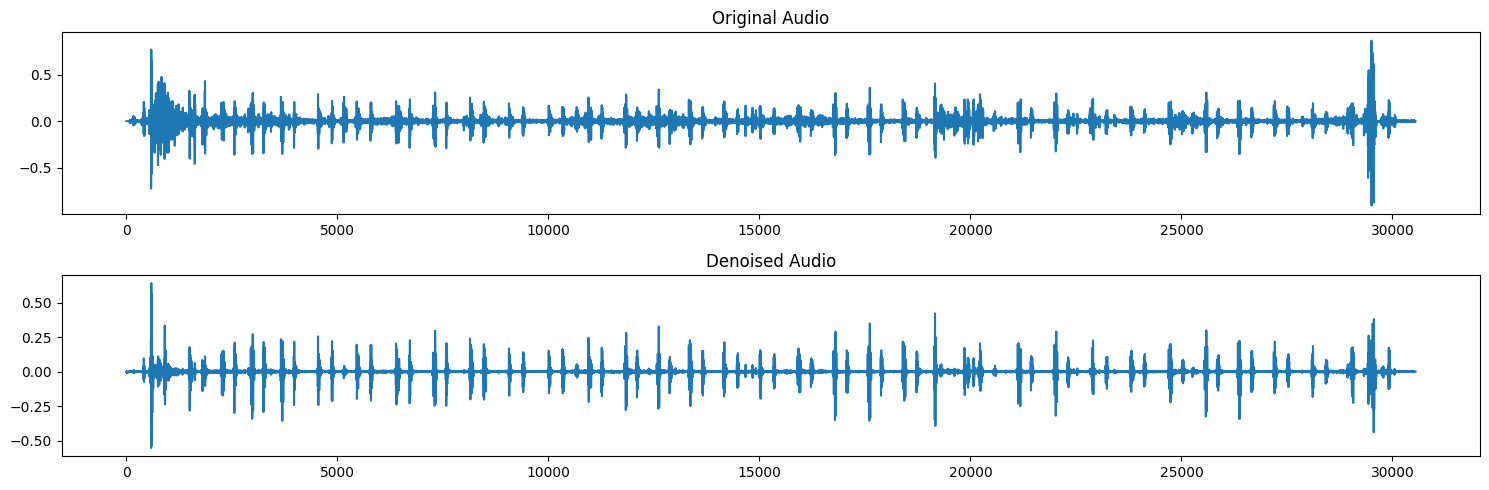

In [25]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import soundfile as sf
from tensorflow import keras

# Load the trained model
#8sec
#model = keras.models.load_model('/Users/gemwincanete/Desktop/LU-Net-Heart-Sound-Denoising-/best_model_denoise.h5')
#12 sec
model = keras.models.load_model('/Users/gemwincanete/Desktop/LU-Net-Heart-Sound-Denoising-/best_model_denoise.h5', compile=False)

# Load audio
audio_path = '/Users/gemwincanete/Desktop/LU-Net-Heart-Sound-Denoising-/my recording/Fan heart.wav'
target_sr = 1000  # Use the same as your training: sampling_rate_new from config.py
frame_length = 12000 # input_shape from config.py

audio, sr = librosa.load(audio_path, sr=target_sr)
print(f'Loaded audio with shape: {audio.shape}, Sample Rate: {sr}')

# Pad audio to fit an integer number of frames
n_frames = int(np.ceil(len(audio) / frame_length))
pad_length = n_frames * frame_length - len(audio)
audio_padded = np.pad(audio, (0, pad_length), mode='constant')

# Reshape into frames for model input
audio_frames = audio_padded.reshape(n_frames, frame_length)
audio_frames = np.expand_dims(audio_frames, axis=-1)  # shape: (n_frames, 800, 1)
print(f'Input to model: {audio_frames.shape}')  # Should be (n_frames, 800, 1)

# Denoise each frame
denoised_frames = model.predict(audio_frames)
denoised_audio = denoised_frames.flatten()[:len(audio)]  # Remove padding

# Plot original and denoised audio
plt.figure(figsize=(15, 5))
plt.subplot(2, 1, 1)
plt.title('Original Audio')
plt.plot(audio)
plt.subplot(2, 1, 2)
plt.title('Denoised Audio')
plt.plot(denoised_audio)
plt.tight_layout()
plt.show()

# Save denoised audio
#sf.write('../my recording/murmur_denoised.wav', denoised_audio, target_sr)
#print("Denoised audio saved as '../my recording/murmur_denoised.wav'.")


In [26]:
# For your actual audio
print("Original Audio:")
display(Audio(audio, rate=target_sr))

print("Denoised Audio:")
display(Audio(denoised_audio, rate=target_sr))

Original Audio:


Denoised Audio:
